In [6]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [7]:
df = pd.read_excel('C:\\Users\\До\\Documents\\ABD_PRJ_25\\clean.xlsx')

****ЭТАП 3: Гипотезы****

**Гипотеза 1:**  
Нулевая гипотеза H0: Заработная плата не зависит от стажа и графика работы.  
Альтернативная гипотеза H1: Заработная плата зависит от стажа и графика работы. 

Статистики теста ANOVA:
                                 sum_sq      df           F        PR(>F)
C(experience)              4.277871e+11     2.0  164.116248  6.957855e-63
C(schedule)                5.452500e+08     1.0    0.418359  5.178957e-01
C(experience):C(schedule)  2.979356e+08     2.0    0.114300  8.920012e-01
Residual                   1.393233e+12  1069.0         NaN           NaN

Статистики теста Бартлетта:
 10.361182584390429, p-value: 0.0012869273804658992

Статистики теста Велча:
      Source  ddof1       ddof2         F   p-unc       np2
0  schedule      1  605.154453  0.811958  0.3679  0.000837


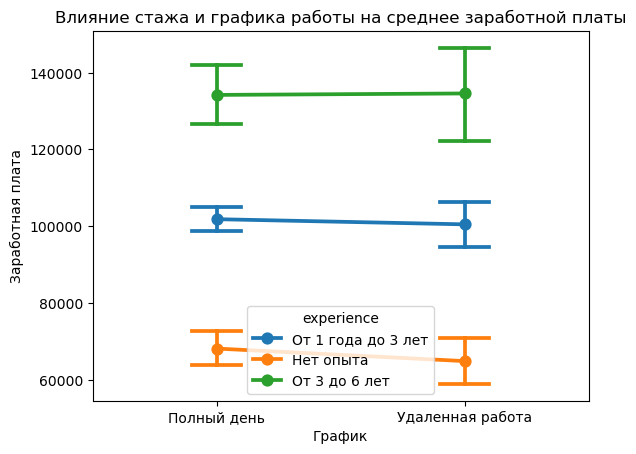

In [8]:
model_main = sm.ols('salary ~ C(experience) * C(schedule)', data=df).fit()
anova_test = anova_lm(model_main, typ = 2)
print('Статистики теста ANOVA:')
print(anova_test)
print()

salary = df.groupby('schedule')['salary'].apply(list)
bartlett_stat, bartlett_p = stats.bartlett(*salary)
print(f'Статистики теста Бартлетта:\n {bartlett_stat}, p-value: {bartlett_p}')
print()

welch_test = pg.welch_anova(data=df, dv='salary', between='schedule')
print(f'Статистики теста Велча:\n {welch_test}')

sns.pointplot(x='schedule', y='salary', hue='experience', data=df, capsize=0.2)
plt.title('Влияние стажа и графика работы на среднее заработной платы')
plt.xlabel('График')
plt.ylabel('Заработная плата')
plt.show()

**Вывод:** На основании проведенных статистических тестов были получены частично статистически значимые результаты, которые позволяют отклонить нулевую гипотезу (Заработная плата не зависит от стажа и графика работы).  
Результаты теста ANOVA показали, что опыт работы оказывает статистически значимое влияние на заработную плату p-value < 0.001. Это свидетельствует о том, что с увеличением стажа уровень заработной платы изменяется.  
Однако график работы не оказывает статистически значимого влияния на заработную плату p-value = 0.518. Нарушение предположения о гомоскедастичности, выявленное тестом Бартлетта p-value = 0.0013, было учтено при помощи теста Велча, который также не показал статистически значимого влияния графика работы на заработную плату p-value = 0.368. Взаимодействие между опытом и графиком работы также не было статистически значимым p-value = 0.892.

**Гипотеза 2**  
Нулевая гипотеза Н0. Среднее значение заработной платы вакансий, размещенных в Москве, и Санкт-Петербурге одинаковы.  
Альтернативная гипотеза Н0. Средняя заработная плата вакансий, размещенных в Москве выше, чем вакансий, размещенных в Санкт-Петербурге.


 Теск U-критерий Манна-Уитни:
 MannwhitneyuResult(statistic=31406.5, pvalue=0.02109215884539756)


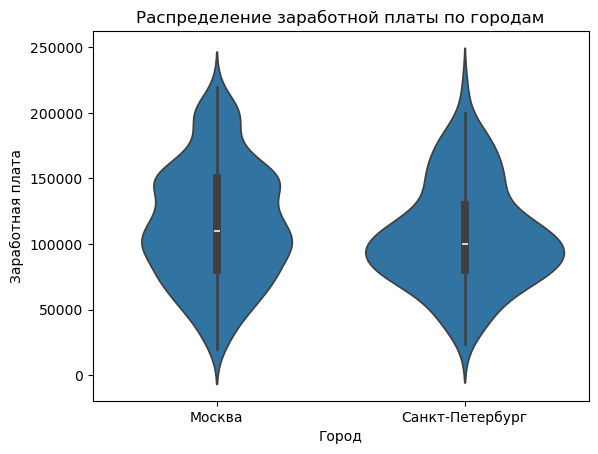

In [9]:
df_mean = df.query('city == "Москва" or city == "Санкт-Петербург" ')
df_moscow = df[df['city'] == 'Москва']['salary']
df_spb = df[df['city'] == 'Санкт-Петербург']['salary']

mann_whitney_test = stats.mannwhitneyu(df_moscow, df_spb, alternative='greater')  
print(f' Теск U-критерий Манна-Уитни:\n {mann_whitney_test}')

sns.violinplot(data=df_mean, x='city', y='salary')
plt.title('Распределение заработной платы по городам')
plt.xlabel('Город')
plt.ylabel('Заработная плата')
plt.show()

**Вывод :**  
На основании проведенного теста U-критерия Манна-Уитни можно сделать вывод о том, что есть статистически значимый результат позволяющий отвергнуть нулевую гипотезу.  
Поскольку p-value = 0.0211 меньше уровня значимости 0.05, мы имеем достаточно оснований, чтобы отклонить предположение о равенстве средних значений заработной платы вакансий, размещенных в Москве и Санкт-Петербурге. Мы можем предположить, что средняя заработная плата вакансий, размещенных в Москве, статистически значимо выше, чем средняя заработная плата вакансий, размещенных в Санкт-Петербурге.


**Гипотеза 3**  
Нулевая гипотеза Н0. Владение Python не оказывает статистически значимого влияния на среднюю заработную плату аналитика.  
Альтернативная гипотеза Н1. Владение Python увеличивает среднюю заработную плату аналитика.


 Теск U-критерий Манна-Уитни:
 MannwhitneyuResult(statistic=41693.0, pvalue=0.2866592453575517)


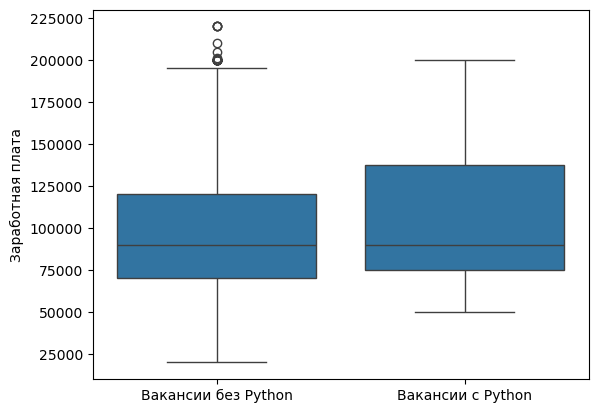

In [10]:
skill = 'Python' 
df[skill] = df['key_skills'].apply(lambda x: 1 if skill.lower() in x.lower() else 0)
skill_p = df[df[skill] == 1]['salary']
skill_n = df[df[skill] == 0]['salary']

mann_whitney_test_p = stats.mannwhitneyu(skill_p, skill_n)
print(f' Теск U-критерий Манна-Уитни:\n {mann_whitney_test_p}')

sns.boxplot(data=df, x='Python', y='salary')
plt.xticks([0, 1], ['Вакансии без Python', 'Вакансии с Python']) 
plt.xlabel(None)
plt.ylabel('Заработная плата')
plt.show()

**Вывод :**  
Тест U-критерий Манна-Уитни показал, что p-value = 0.287. Поскольку p-value > уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу. Таким образом, нет достаточных статистически значимых результатов утверждать, что владение Python влияет на среднюю заработную плату аналитика.